In [16]:
%reload_ext autoreload
%autoreload 2

In [17]:
from plato.detection import DetectionModel
from astropy import units as u

import numpy as np

In [18]:
model = DetectionModel()

In [30]:
r_planet = 1.0 * u.Rearth
r_star = 1.0 * u.Rsun
porb = 365.0 * u.day
m_star = 1.0 * u.Msun
magnitude_v = 14.0
n_cameras = 24

In [36]:
# calculate detection efficies on a grid of r_planet and porb
r_planet = np.linspace(0.3, 3.0, 100) * u.Rearth
porb = np.geomspace(1, 500, 1000) * u.day
r_planet, porb = np.meshgrid(r_planet, porb)
eff = model.detection_efficiency(r_planet, r_star, porb, m_star, magnitude_v, n_cameras)

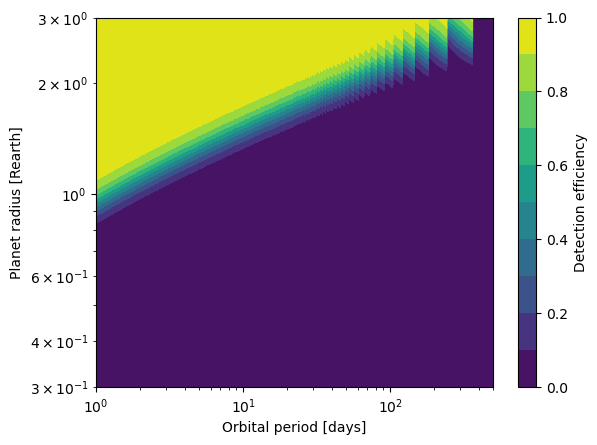

In [35]:
# plot the results
import matplotlib.pyplot as plt

plt.figure()
plt.contourf(
    porb,
    r_planet,
    eff,
    levels=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
)
plt.xlabel("Orbital period [days]")
plt.ylabel("Planet radius [Rearth]")
plt.colorbar(label="Detection efficiency")
plt.xscale("log")
plt.yscale("log")
plt.show()